# import python libs

In [5]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [7]:
cur=conn.cursor()


# Q1

In [4]:
sql_stat = """
        select * from gp9.student

"""

In [5]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,s_email,s_name,major
0,johndoe@gmail.com,john doe,biology
1,tinaturner@gmail.com,tina turner,history
2,steveo@gmail.com,steve ozark,chemistry
3,billsmith@gmail.com,bill smith,isat


# q2


In [12]:
sql_stat = """
select gp9.professor.p_name,
        gp9.course.c_name
    from gp9.professor
    inner join gp9.course
    on gp9.professor.p_email = gp9.course.p_email
"""


In [13]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,c_name
0,noel hendrickson,counterfactual reasoning
1,xuebin wei,data mining
2,stephen marrin,issues in ia
3,p_new_n,c_new_name
4,p_new_n,money laundering


# q3

In [20]:
q3_sql = """
                select count(c_number) as enrolled,
                c_number
                from gp9.enroll_list
                group by c_number


"""

<AxesSubplot:xlabel='c_number'>

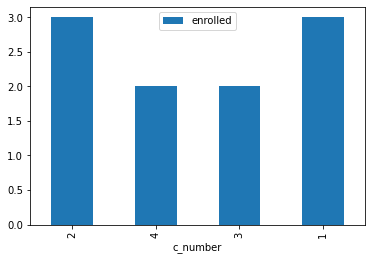

In [21]:
df=pandas.read_sql_query(q3_sql,conn)
df.plot.bar(x='c_number',y='enrolled')

# q4

In [34]:
q4_sql = """
                select gp9.professor.p_name,
                    count(gp9.course.c_name) as teaching_number
                from gp9.professor
                inner join gp9.course
                on gp9.professor.p_email = gp9.course.p_email
                group by professor.p_name
                order by teaching_number desc
                

"""

<AxesSubplot:xlabel='p_name'>

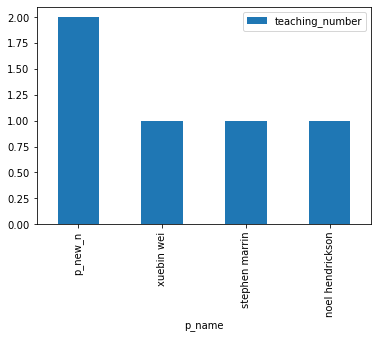

In [43]:
df=pandas.read_sql_query(q4_sql,conn)
df.plot.bar(x='p_name',y='teaching_number')

# q5

In [8]:
q5_insert_professor_sql = """
            insert into gp9.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp9.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [9]:
cur.execute(q5_insert_professor_sql)

In [10]:
conn.commit()

In [11]:
df=pandas.read_sql_query('select * from gp9.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,noel hendrickson,isat 292
1,weixx@jmu.edu,xuebin wei,hhs112
2,marrinsp@jmu.edu,stephen marrin,isat4012
3,p_new_e,p_new_n,p_new_o
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [12]:
q5_insert_course_sql = """
            insert into gp9.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp9.course(c_number,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [13]:
cur.execute(q5_insert_course_sql)

In [14]:
conn.commit()

In [15]:
df=pandas.read_sql_query('select * from gp9.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,1,counterfactual reasoning,isat420,hendrinx@jmu.edu
1,2,data mining,isat10,weixx@jmu.edu
2,3,issues in ia,engeo12,marrinsp@jmu.edu
3,c_new_num,c_new_name,c_new_r,p_new_e
4,4,money laundering,isat200,p_new_e
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# q6

In [16]:
q6_update_course_sql ="""
                    update gp9.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [17]:
cur.execute(q6_update_course_sql)

In [18]:
conn.commit()

In [20]:
df=pandas.read_sql_query('select * from gp9.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,1,counterfactual reasoning,isat420,hendrinx@jmu.edu
1,2,data mining,isat10,weixx@jmu.edu
2,3,issues in ia,engeo12,marrinsp@jmu.edu
3,c_new_num,c_new_name,c_new_r,p_new_e
4,4,money laundering,isat200,p_new_e
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [21]:
q6_delete_professor_sql = """
                            delete from gp9.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')


In [22]:
cur.execute(q6_delete_professor_sql)

In [23]:
conn.commit()

In [24]:
df=pandas.read_sql_query('select * from gp9.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,noel hendrickson,isat 292
1,weixx@jmu.edu,xuebin wei,hhs112
2,marrinsp@jmu.edu,stephen marrin,isat4012
3,p_new_e,p_new_n,p_new_o
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [25]:
cur.close()

In [26]:
conn.close()